In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [47]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1543,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27681,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import matplotlib.pyplot as plt

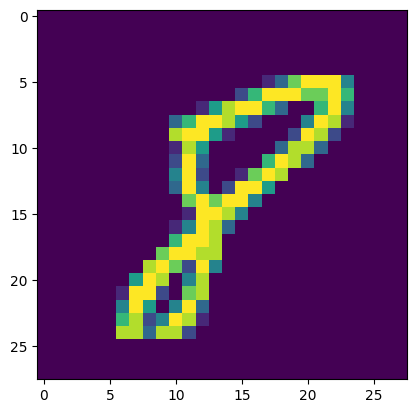

In [6]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

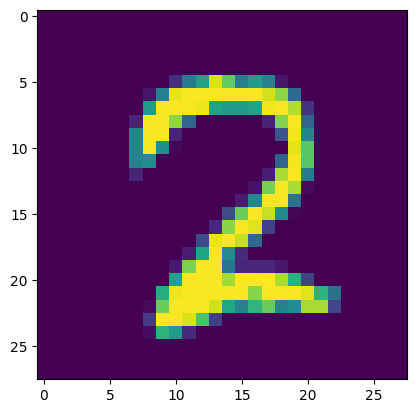

In [8]:
plt.imshow(df.iloc[27681,1:].values.reshape(28,28))

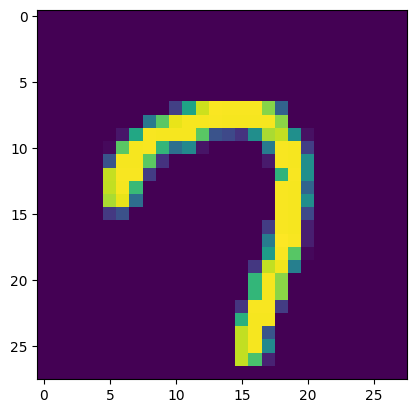

In [10]:
plt.imshow(df.iloc[1543,1:].values.reshape(28,28))

In [11]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


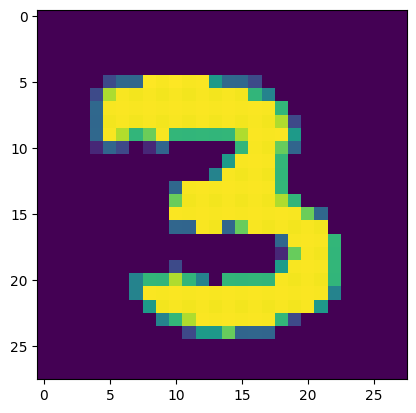

In [13]:
plt.imshow(df.iloc[40995,1:].values.reshape(28,28))

In [52]:
X = df.iloc[:,1:]
y = df.iloc[:,0] 

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


In [18]:
df.isnull()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test)

In [30]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.994699478149414


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [56]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [57]:
X_train.shape

(33600, 784)

In [58]:
X_train_trf.shape

(33600, 100)

In [40]:
pca = PCA(n_components=100)

In [42]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
X_train.shape

(33600, 100)

In [60]:
knn = KNeighborsClassifier()

In [61]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test_trf)

In [64]:
accuracy_score(y_test,y_pred)

0.9538095238095238

In [73]:
pca = PCA(n_components=200)

In [74]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [75]:
X_train_trf.shape

(33600, 200)

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [78]:
y_pred = knn.predict(X_test_trf)

In [79]:
accuracy_score(y_test,y_pred)

0.9511904761904761

In [82]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.25916666666666666
0.3244047619047619
0.5103571428571428
0.6661904761904762
0.7375
0.8226190476190476
0.843452380952381
0.8725
0.8860714285714286
0.905952380952381
0.9130952380952381
0.9169047619047619
0.9278571428571428
0.934404761904762
0.9384523809523809
0.9380952380952381
0.9407142857142857
0.9410714285714286
0.9441666666666667
0.9436904761904762
0.9447619047619048
0.9433333333333334
0.9445238095238095
0.9461904761904761
0.9472619047619047
0.9469047619047619
0.9478571428571428
0.9476190476190476
0.9498809523809524
0.9483333333333334
0.9517857142857142
0.9517857142857142
0.95


KeyboardInterrupt: 

# Transforming to a 2D coordinate system

In [83]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [84]:
X_train_trf

array([[-2.71861229, -0.48999478],
       [-0.67691415, -6.75415792],
       [-3.03323372,  6.50989077],
       ...,
       [ 2.14879459,  0.78090301],
       [ 1.05957905,  0.94770705],
       [17.70259749,  1.96211193]])

In [88]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

# Transforming in 3D

In [89]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [90]:
X_train_trf

array([[-2.71861395, -0.4904882 ,  1.13661113],
       [-0.67698864, -6.75308968, -2.33714279],
       [-3.03323582,  6.51000687,  7.49192331],
       ...,
       [ 2.14880845,  0.78133709, -0.74847477],
       [ 1.0596082 ,  0.94634582,  3.95225265],
       [17.70263186,  1.96041976, -4.94140333]])

In [95]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1],z=X_train_trf[:,2],
              color = y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [99]:
pca.explained_variance_

# Eigon values

array([40.67111198, 29.17023362, 26.74459454])

In [100]:
pca.components_

# Eigon vectors

array([[-1.69603092e-18, -5.70660483e-19,  1.93267089e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.69361637e-18,  1.48574708e-17, -2.66784441e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.99055849e-17, -1.12039295e-17,  7.18088473e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [101]:
pca.components_.shape

(3, 784)

In [103]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [104]:
# prajwal🤔 Lets find out kya optimum number hain is data set ke upper.

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [106]:
pca.explained_variance_.shape

(784,)

In [108]:
pca.components_.shape

(784, 784)

In [109]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [111]:
# ab main kya krunga aya pe cumulative sum karunga.

np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

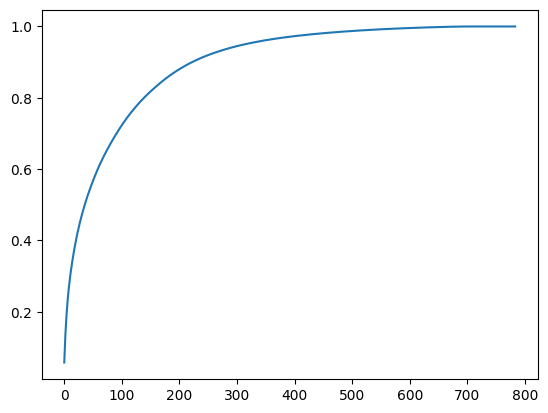

In [112]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))